### Statistical Analysis of Data:
- We can organize, summarize, and visualize large amounts of data to find patterns that otherwise would remain hidden.
- We often use a small dataset (sample) to answer questions about a much larger dataset (population).

**Population:** The set of all individuals/units relevant to a particular statistical question.<br>
**Sample:** A smaller group selected from a population.

Ex: We have data about the salaries of all the individuals in the company working in IT roles.
In these cases, our data is:
- Average salary of the individuals in our company working in IT roles - Population
- Average salary of the individuals in the entire project - Sample

**Parameter:**
- Metric specific to a population.
- Ex: Average salary of all employees.

**Statistic:**
- Metric specific to a sample.
- Ex: Average salary of the IT employees.

**Sampling Error:** The difference between the metrics of a population and the metrics of a sample.

In [9]:
# Working with a dataset now

import pandas as pd
import numpy
import matplotlib.pyplot as plt

wnba = pd.read_csv('datasets/wnba.csv')
wnba.head(3)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0


Find the maximum number of games played by a player using the "Games Played" column.<br>
In this case, the dataset is a population, since it contains all the players who played at least one game.<br>
So, the result (max games) will be a parameter.

In [10]:
parameter=wnba['Games Played'].max()
parameter

32

Creating a random sample of 30 players from the population using the DataFrame.sample() method.<br>
Note: random_state = n ensures reproducible results (we get the same sample each time).<br>

The, find the maximum games played using this sample.<br>
So, the result will be a statistic.

In [19]:
sample=wnba.sample(random_state=1, n=30)
sample.head(3)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
78,Keisha Hampton,CHI,F,185,78.0,22.790358,US,"February 22, 1990",27,DePaul,...,36,59,95,24,20,7,21,207,0,0
116,Saniya Chong,DAL,G,173,64.0,21.383942,US,"June 27, 1994",23,Connecticut,...,9,19,28,33,21,3,23,87,0,0
31,Carolyn Swords,SEA,C,198,95.0,24.232221,US,"July 19, 1989",28,Boston College,...,10,29,39,9,5,4,22,54,0,0


In [20]:
statistic=sample['Games Played'].max()
statistic

30

In [21]:
sampling_error=parameter-statistic
sampling_error

2

Samples should be representative of their corresponding populations. 
**The more representative a sample is, the smaller the sampling error.**
<br>We can try to give every individual in the population an equal chance for selection in our samples by doing **random sampling**.

**Simple random sampling (SRS):** Generate random numbers and use them to select sample units from the population.<br>
Dataframe.sample() and Series.sample() methods use this.

Take 100 samples of 10 values each from the "PTS" column using simple random sampling. For each sample, measure the average points scored by a player.<br>
Next, find the population mean from the "PTS" column. Compare the means.

In [54]:
# Finding sample means
# Loop 100 times to sample the dataset, change the random state each time

sample_means = []

for i in range(100):
    sample = wnba['PTS'].sample(40, random_state=i)
    sample_means.append(sample.mean())

In [55]:
population_mean = wnba['PTS'].mean()

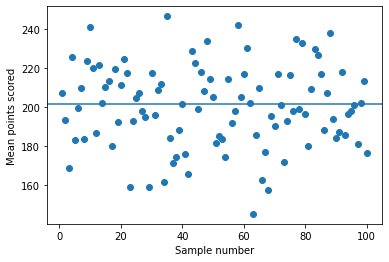

In [56]:
# Visualizing them to compare

plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.xlabel("Sample number")
plt.ylabel("Mean points scored")
plt.show()

The sample means varies a lot around the population mean (sampling error is very high for many samples).<br>
We can solve this problem by increasing the sample size. <br>
As we increase the sample size, the sample means vary less around the population mean.